In [53]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

music = pd.DataFrame()
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]
music['bpm'] = [ 105, 90, 78, 75, 120, 110, 80, 100, 105, 60,
                  70, 105, 95, 70, 90, 105, 70, 75, 102, 100,
                  100, 95, 90, 80, 90, 80, 100, 105, 70, 65]

## KNN Regression

KNN is a reasonable algorithm for regression as well as classification.

- k observations vote for a value instead of a category

- algorithm averages votes instead of taking most popular response

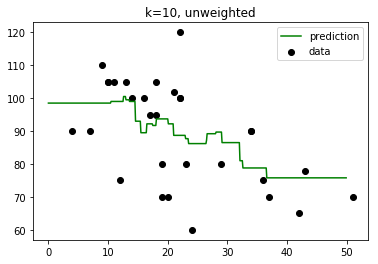

loudness    int64
dtype: object


In [56]:
from sklearn import neighbors

#build model
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
X = pd.DataFrame(music.loudness)
Y = music.bpm
knn.fit(X,Y)

#set up prediction line
T = np.arange(0,50,0.1)[:, np.newaxis]

#trailing underscores are a common convention for prediction
Y_ = knn.predict(T)

plt.scatter(X.values, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('k=10, unweighted')
plt.show()

print(X.dtypes)

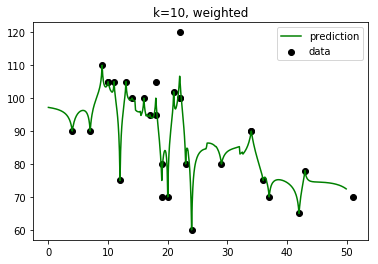

In [10]:
#run the same model with weights
knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
X = pd.DataFrame(music.loudness)
Y = music.bpm
knn_w.fit(X,Y)

#set up prediction line
T = np.arange(0,50,0.1)[:, np.newaxis]

Y_ = knn_w.predict(T)

plt.scatter(X.values, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('k=10, weighted')
plt.show()

__Result:__ weighted model is overfitting. Oscillation around datapoints is because the decay in weight happens so quickly

## Validating KNN

Validating KNN is very similar to validating other classifiers or regression. Cross val, holdouts, r-squared all still apply.

In [6]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn,X,Y,cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w,X,Y,cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: -0.18 (+/- 0.66)
Weighted Accuracy: 0.11 (+/- 0.94)


__Result:__ these are very bad models, there doesn't appear to be much of a relationship

Why don't you add the other feature and mess around with kk and weighting to see if you can do any better than we've done so far?

In [52]:
#build unweighted and weighted models with k=5
knn2 = neighbors.KNeighborsRegressor(n_neighbors=5)
knn_w2 = neighbors.KNeighborsRegressor(n_neighbors=5, weights='distance')
X2 = pd.DataFrame(music[['loudness','duration']])
Y2 = music[['bpm']]
knn2.fit(X2,Y2) #fit new unweighted
knn_w2.fit(X2,Y2) #fit new weighted

#set up prediction lines T2 loudness, T3 duration
T2 = np.arange(0,50,0.1)[:, np.newaxis]
T3 = np.arange(100,400,0.6)[:, np.newaxis] #shape must be the same as T2
#print(np.shape(T2))
#print(np.shape(T3))

#concate prediction lines
T4 = np.c_[T2,T3]

#trailing underscores are a common convention for prediction
Y2_ = knn2.predict(T4)
Y_w2_ = knn_w2.predict(T4)

#run cross val
score2 = cross_val_score(knn2,X2,Y2,cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score2.mean(), score2.std() * 2))
score_w2 = cross_val_score(knn_w2,X,Y,cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w2.mean(), score_w2.std() * 2))

Unweighted Accuracy: -0.75 (+/- 1.16)
Weighted Accuracy: -0.51 (+/- 1.24)
